# 1. En Nobel Ödülü
* Nobel Ödülü belki de dünyanın en iyi bilinen bilim ödülüdür. Onur, prestij ve önemli miktarda para ödülü dışında, alıcı ayrıca bir altın madalya alır. Her yıl kimya, edebiyat, fizik, fizyoloji veya tıp, ekonomi ve barış kategorilerinde bilim adamlarına verilir. Önceleri ödül daha çok Avrupa merkezli ve erkek odaklıydı, ancak günümüzde hiçbir şekilde önyargılı değil. Dimi?
* Nobel Vakfı özülün başladığı 1901'den 2016'ya kadar tüm ödül kazananların bir veri setini kullanıma sundu.

In [1]:
# kütüphanelerin importu
import pandas as pd
import seaborn as sns
import numpy as np

# veriyi okuma
nobel = pd.read_csv("datasets/nobel.csv")

# ilk 6 satır
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# 2. Peki, Nobel Ödülü'nü kimler aldı?
* 1901'den 2016'ya kadar en çok hangi cinsiyet ve hangi ülke ödül aldı.

In [2]:
# verilen ödül sayısı
display(len(nobel))

# cinsiyetlere göre verilen ödül sayıları
display(nobel["sex"].value_counts())

# en çok ödül alan 10 ülkenin listesi
nobel["birth_country"].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

# 3. ABD hakimiyeti
* ABD, ne zaman ödül listelerine hakim olmaya başladı?

In [3]:
# ABD'nin kazandığı ödüller için bir sütun ve yıllık periyotlar
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = [int(year // 10 * 10) for year in nobel["year"]]
prop_usa_winners = nobel.groupby("decade", as_index = False)["usa_born_winner"].mean()

# ABD'nin on yıllık periyotlarda kazanma oranları
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


# 4. ABD hakimiyeti, görselleştirilmiş
* Ne zaman hakim olduğuna grafik üzerinden bakalım.

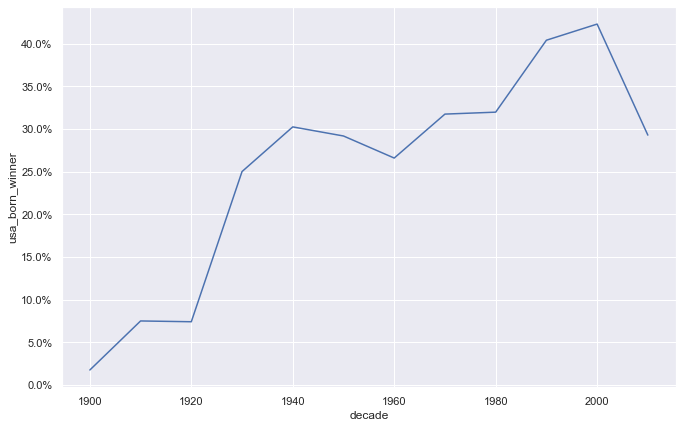

In [4]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x = "decade", y = "usa_born_winner", data = prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# 5. Nobel Ödülü kategorilerinde cinsiyet
* ABD, 1930'lardan itibaren hakimiyeti elinde tuttu. Erkekler en başından beri önde. Acaba bu kategori ayırt ediyor mu?

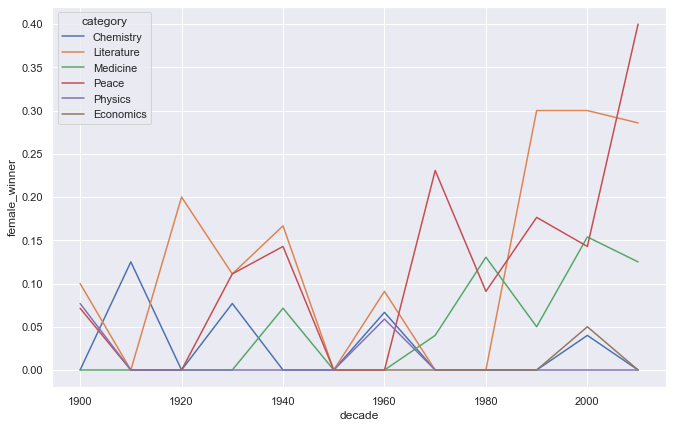

In [5]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade","category"], as_index = False)["female_winner"].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x = "decade", y = "female_winner", data = prop_female_winners, hue = "category")


# 6. Nobel Ödülünü kazanan ilk kadın
* 1990'lardan sonra kadınların kazanma sayılarında artış bulunuyor. Peki ilk kazanan kadın kim ve hangi kategoride?

In [6]:
# Nobel Ödülünü kazanan ilk kadın
nobel[nobel.sex == 'Female'].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# 7. Tekrar kazananlar
* Birden fazla nobel kazananlar

In [7]:
nobel.groupby("full_name").filter(lambda group: len(group) > 1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


# 8. Ödülü aldığında kaç yaşındaydı?
* Ödülü aldıklarında genellikle kaç yaşındalardı?

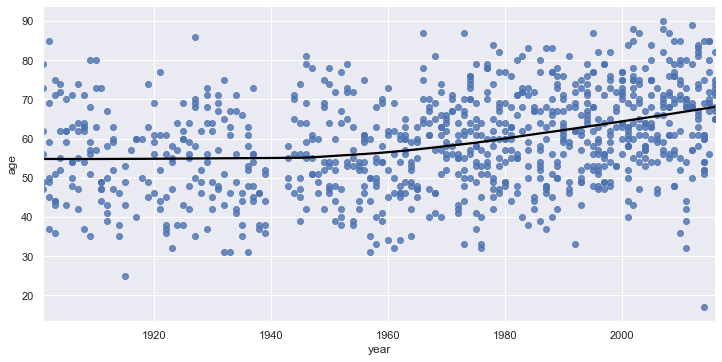

In [8]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel["birth_date"])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x = "year", y = "age", data = nobel,
          lowess=True, aspect = 2, line_kws={'color' : 'black'})

# 9. Ödül kategorileri arasındaki yaş farklılıkları
* Eskiden ödül alma ortalaması 55 yaş civarında iken günümüzde 65'e yakın. Ancak ödül alanların yaşlarında büyük bir yayılım var ve çoğu 50+ iken bazıları çok genç.
* Şu an çok fazla ödül alınmasının sebebi ödülün paylaşılıyor olması ve 1939 - 1945 arasında da dünya savaşı bulunuyor.
* Farklı ödül kategorilerindeki yaş trendlerine bakalım.

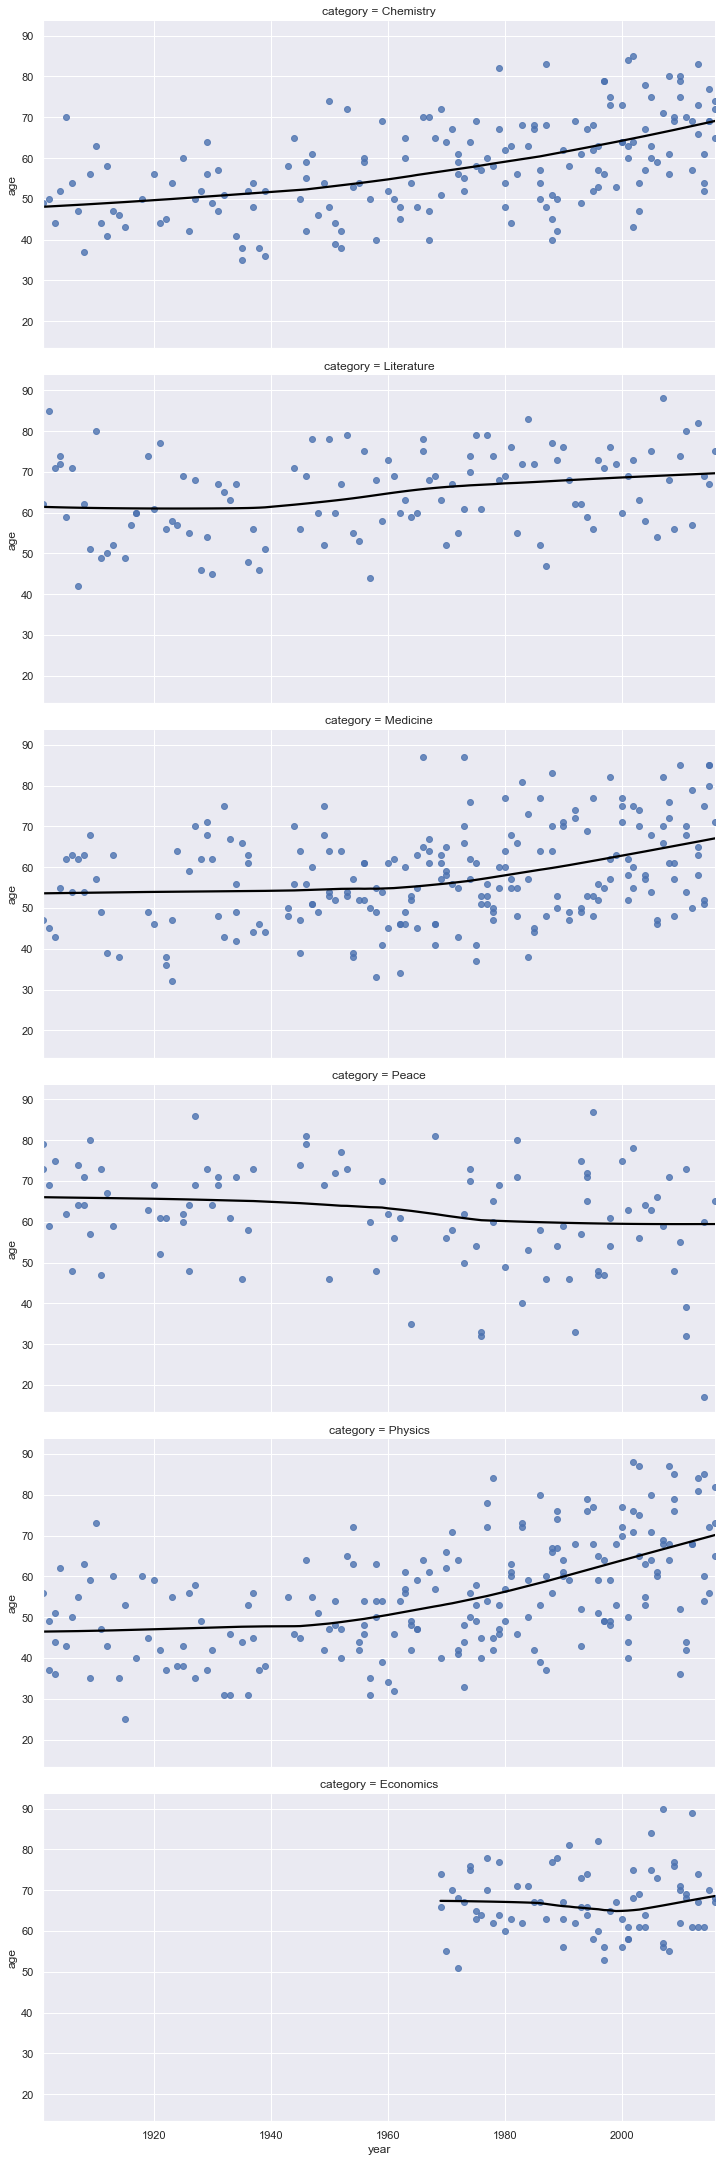

In [20]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x = "year", y = "age", data = nobel, row = "category",
          lowess=True, aspect = 2, line_kws={'color' : 'black'})

# 10. En yaşlı ve en geç kazananlar
* Kimya, tıp ve fizikte kazanma yaşı oldukça geç. En güçlü eğilim fizikte. 50'lerden 70'lere bir yükseliş var. Edebiyat ve ekonomi daha ısrarlı ve ekonomi henüz yeni bir kategori. Barış ödülü de tersine bir eğilim gösteriyor. 
* Acaba ödülü kazanan en genç ve en yaşlı kişiler kim?

In [23]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "age"))

# The youngest winner of a Nobel Prize as of 2016
display(nobel.nsmallest(1, "age"))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
